In [1]:
from pathlib import Path

from matplotlib import pyplot as plt
import cv2
from os.path import join
from tqdm import tqdm

import core
from config import original_images, data_path


In [4]:
# core.set_average_intensity_multiple(original_images, "/mnt/d/cloud/OneDrive - Mass General Brigham/projects/drug_delivery/drug_delivery_sem_rami/data/2_avg_intensity")

In [19]:
""" CLAHE calculations for all the adjusted intensities """
# images = list(map(str, list((data_path/"2_avg_intensity").rglob("*"))))
# images.sort()


# for i in tqdm(images):
#     img_clahe = core.clahe(core.read(i))
#     cv2.imwrite(str(data_path/"3_avg_intensity_clahe"/Path(i).name), img_clahe)

100%|██████████| 165/165 [03:34<00:00,  1.30s/it]


In [2]:
# CLAHE calculations for all the adjusted intensities
clahe_images = list(map(str, list((data_path/"3_avg_intensity_clahe").rglob("*"))))
clahe_images.sort()

In [22]:
img_file = clahe_images[69]
img = cv2.imread(img_file, 0)

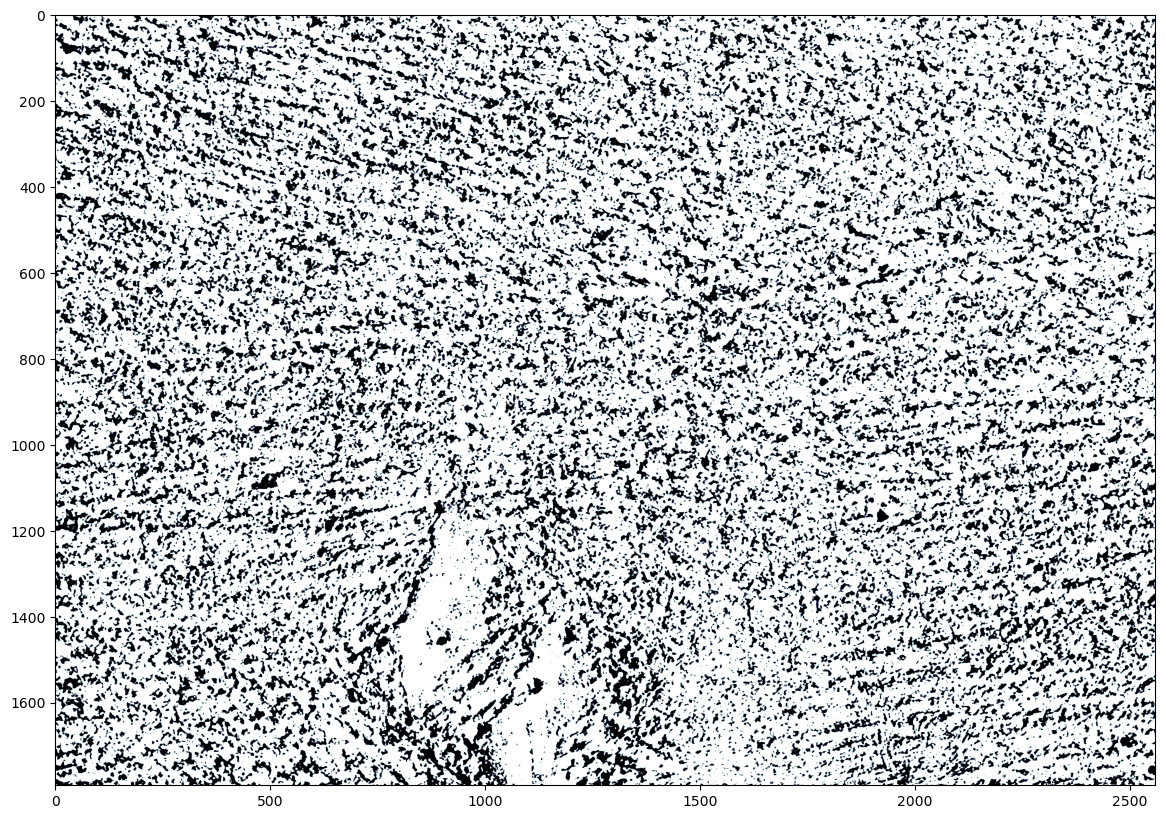

In [43]:
img_thresholded = core.threshold(img_file, 100, 120)
plt.imshow(img_thresholded, cmap="bone")

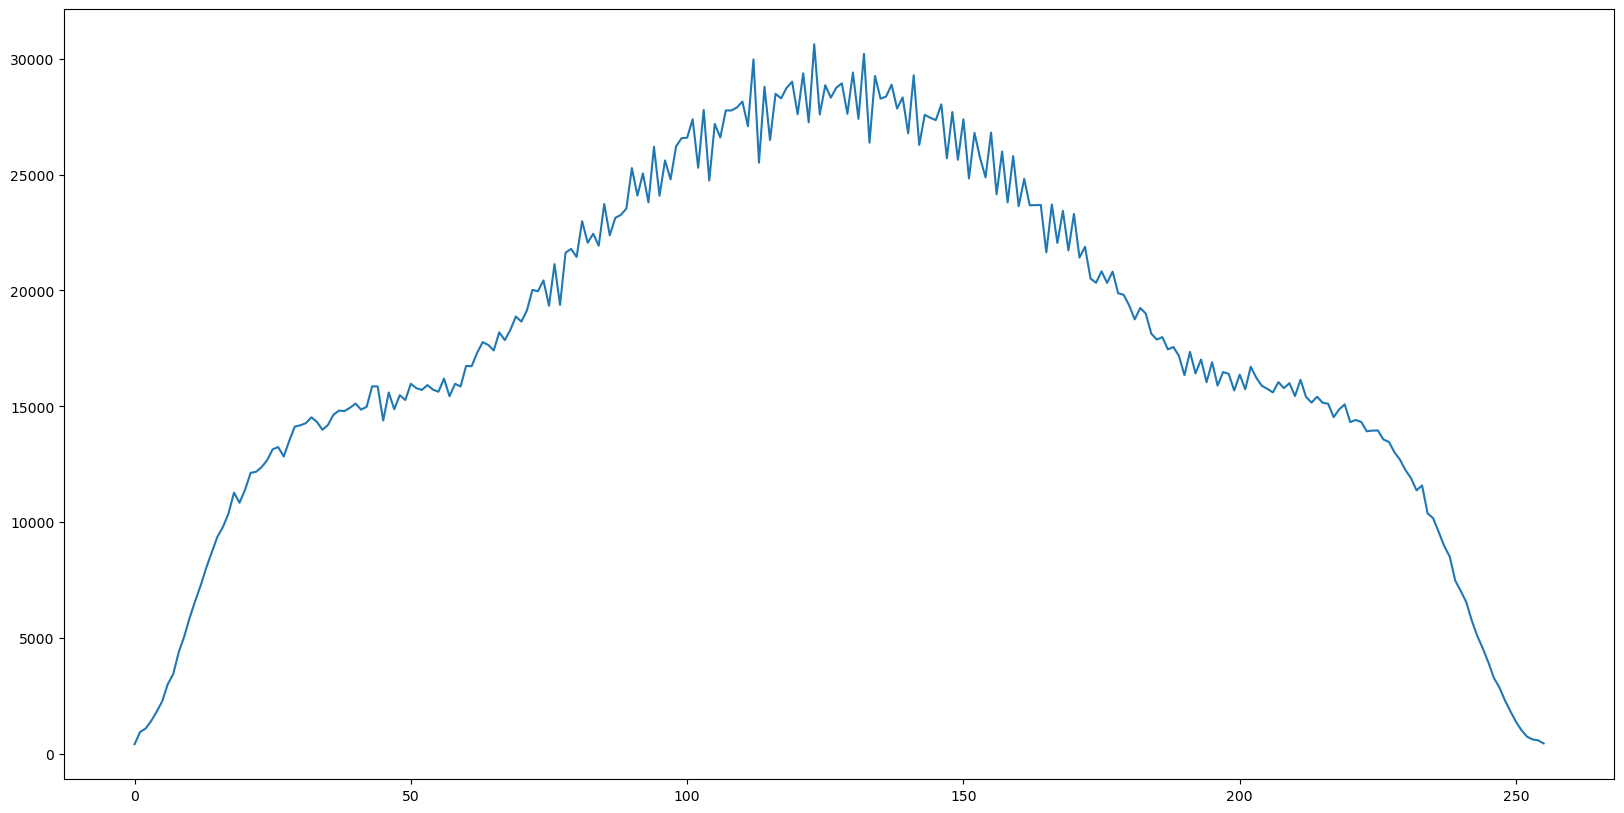

In [39]:
hist = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(range(len(hist)), hist)

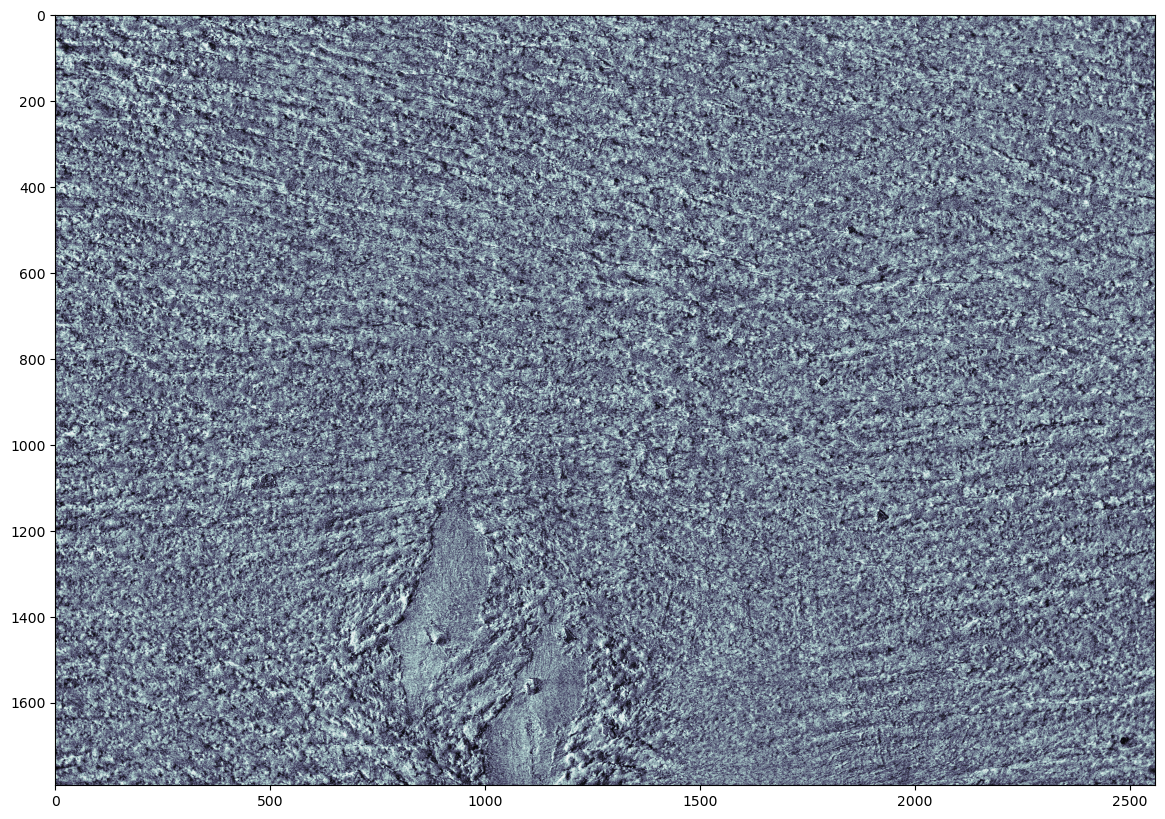

In [18]:
mask ,contours = core.detect_contour(img_thresholded, 0.1, 0.9, 100, 10000)

plt.rcParams["figure.figsize"] = (20,10)

img_org = cv2.imread(img, 0)

cv2.drawContours(img_org, contours, -1, (255, 0, 0), 3)

plt.imshow(img_org, cmap="bone")
